## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

<span style="color: red;">Import packages</span>.

In [191]:
#Import packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

<span style="color: red;">Upload the dataset and perform the necessary calculations</span>.

In [192]:
#Upload the dataset with panda and read the first few rows
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [193]:
#Observe the row numbers in the dataset
len(df.index)

294478

c. The number of unique users in the dataset.

In [194]:
#Observe the unique value numbers in the dataset
df.user_id.nunique()

290584

d. The proportion of users converted.

In [195]:
#Querry the proportion of users converted in the dataset
len(df.query('converted==1'))/len(df.index)

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [196]:
#The number of times group isn't equal to treatment and landing page is equal to new page
df.query("(group == 'treatment' and landing_page == 'old_page')").shape[0]

1965

f. Do any of the rows have missing values?

In [198]:
#Number of rows of missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [199]:
#Creating new datasets that meets soecifications from the quiz
df_1 = df[(df.group == 'treatment') & (df.landing_page == 'new_page')] 
df_2 = df[(df.group == 'control') & (df.landing_page == 'old_page')] 
frames = [df_1, df_2]
df2 = pd.concat(frames)

In [200]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [201]:
#The number of unique vakues in df2
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [202]:
#Observing the user_id repeated in the fataframe
df2.user_id[df2.user_id.duplicated()]

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [203]:
#Row information of the repeated user_id
df2.loc[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [204]:
#Removing the duplicated rows
df2 = df2.drop_duplicates(['user_id'])

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [205]:
#Probability of an individual converting regardless of the page received
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [206]:
#Probalility of conversion for an individual in control group
control_group = len(df2.query('group=="control" and converted==1'))/len(df2.query('group=="control"'))
control_group

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [207]:
#Probalility of conversion for an individual in treatment group
group_treatment = len(df2.query('group=="treatment" and converted==1'))/len(df2.query('group=="treatment"'))
group_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [208]:
#Probability of an individual receiving the new page
len(df2.query('landing_page=="new_page"'))/len(df2.index)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

>**After the above analysis, the probability of conversion by and individual in the control category is 0.12 in comparison to that of 0.12 for the probability of conversion for that of the treatment category which is approximantely equal to the later, hence, other strategies ought to be taken into considerations.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypotheses:The old page has a greater probability of acquiring visitors if the p-value is less than 5%.

Alternative Hypotheses:The new page has a better likelihood of generating visitors if the p-value is equal or greater than 5%.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [209]:
#Conversion rate for p_new
prob_new = len(df2.query('converted==1'))/len(df2.index)
prob_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [210]:
##Conversion rate for p_old
prob_old = len(df2.query('converted==1'))/len(df2.index)
prob_old

0.11959708724499628

In [211]:
#Probablity under the null value
prob_null = np.mean([prob_old,prob_new])
prob_null

0.11959708724499628

In [212]:
#The difference between p_new and p_old
prob_diff = prob_new - prob_old

c. What is $n_{new}$?

In [213]:
#The calculation the number of queries when landing page is equivalent to new page
numb_new = len(df2.query('landing_page == "new_page"'))
numb_new

145310

d. What is $n_{old}$?

In [214]:
#The calculation the number of queries when landing page is equivalent to old page
numb_old = len(df2.query('landing_page == "old_page"'))
numb_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [215]:
#Simulate the numb_old transactions with a convert rate of prob_new under the null
new_page_converted = np.random.choice([0, 1], numb_new, p = [prob_new, 1-prob_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [216]:
#Simulate the numb_old transactions with a convert rate of prob_old under the null
old_page_converted = np.random.choice([0, 1], numb_old, p = [prob_old, 1-prob_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [217]:
#Difference between new and old
prob_sim_values = new_page_converted.mean() - old_page_converted.mean()
prob_sim_values

0.00027741796351810066

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [218]:
#Simulation of 10,000 values using sampling distributions of prob_new and prob_old
pp_diffs = []
new_converted_simulation = np.random.binomial(n_new, prob_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, prob_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

<span style="color: red;">Plotting of the necessary histograms</span>.

Text(0, 0.5, 'Number of Count')

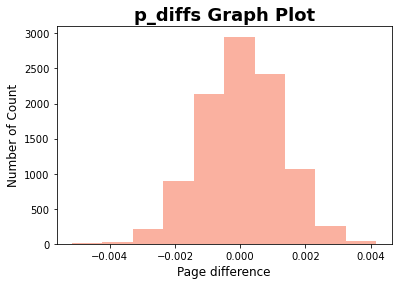

In [220]:
#Histogram of p_diff
p_diffs = np.array(p_diffs)

plt.hist(p_diffs, 
         color = '#fab1a0')
plt.title('p_diffs Graph Plot',
          fontsize = 18,
          fontweight = 'bold')
plt.xlabel('Page difference', 
           fontsize = 12) 
plt.ylabel('Number of Count',
           fontsize = 12)

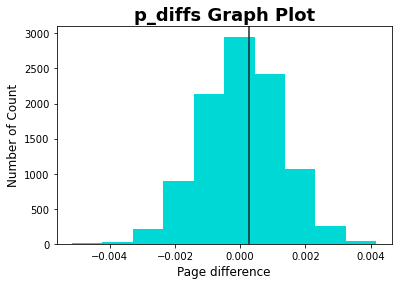

In [221]:
#Histogram of p_diff
plt.hist(p_diffs, 
         color = '#00d8d6')
plt.title('p_diffs Graph Plot',
          fontsize = 18,
          fontweight = 'bold')
plt.xlabel('Page difference', 
           fontsize = 12) 
plt.ylabel('Number of Count',
           fontsize = 12) 

plt.axvline(x= prob_sim_values, color='#1e272e');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [222]:
#Calculation of actual difference
variance_1 = df2[df2['landing_page'] == 'new_page']
variance_1 = variance_1['converted'].mean()
variance_2 = df2[df2['landing_page'] == 'old_page']
variance_2 = variance_2['converted'].mean()
actual_difference = variance_1 - variance_2
count = 0
for i in p_diffs:
    if i > actual_difference:
        count = count +1
print (count/(len(p_diffs)))

0.9082


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The part computed in part j is classified as the p-value, which is the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct. With a calculated p-value of 90.78%, which is above the actual differential, infers that the new page isn't superior than the old page, hence the old page ought to be upheld as the p-value.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

<span style="color: red;">Import Packages and create built in functions</span>.

In [225]:
#Import package
import statsmodels.api as sm

#Creation of built in function
convert_old = len(df2.query('converted == 1 and landing_page == "old_page"')) 
convert_new = len(df2.query('converted == 1 and landing_page == "new_page"')) 
n_old = len(df2.query('landing_page == "old_page"')) 
n_new = len(df2.query('landing_page == "new_page"'))
n_new

145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [227]:
#Calculate the z_score and p_value for left tail
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old, n_new],alternative = 'smaller') 
print(z_score,p_value)

1.3109241984234394 0.9050583127590245


In [228]:
#Calculate the z_score and p_value for right tail
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old],alternative='larger')
print(z_score,p_value)

-1.3109241984234394 0.9050583127590245


In [229]:
#Import package and observe
from scipy.stats import norm
norm.cdf(z_score) 

0.09494168724097551

In [230]:
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score calculated as 1.31 lies inside the 95 percent confidence interval as it is less than the critical number for that confidence interval, which is 1.96. The old page converted more users than the new page, hence the inability to reject the null hypothesis as applicable to part j and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**The objective is to attest to the odds of the conversion using the implementation of logistic regression instead of linear regression..**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [231]:
#Insert a column named 'intercept'
df2['intercept'] = 1

#Create a dummy variable from group column
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [232]:
#import package
import statsmodels.api as sm

logit_model = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result = logit_model.fit() 

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [233]:
#Summary of model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:               8.077e-06
Time:                        02:54:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [234]:
np.exp(0.0150)

1.015113064615719

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Regression models should include covariates because they could affect conversion rates as well. The drawback is that we are unsure in which direction our added element will sway the outcome. As a result of an extra component, our additional factor fluctuates constantly. After this scenario was implemented, the p-value is similar to the previous methodology, 0.1897. The framework incorporated is to predic the conversion of users based off their page with a regression model of the ab_page = 1, the converted = 0 whereas the alternate hypothesis = 1 and converted = 1.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**The treatment or control page did not have make any significant inference on the conversion of the users hence, its imperative to consider other factors in the prediction process and ensure they aren't lying in the same line.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

<span style="color: red;">Upload CSV file</span>.

In [235]:
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [236]:
#Join columns
df2 = df2.set_index('user_id').join(countries.set_index('user_id'))

In [237]:
#Create a dummy variable
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2['country'])

In [238]:
#Logit regression calculation and observation
logit_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'CA', 'UK']])
results = logit_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:               2.323e-05
Time:                        02:56:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [239]:
#Merging dataset
df2['CA_page'] = df2['CA']*df2['ab_page']
df2['UK_page'] = df2['UK']*df2['ab_page']
df2['US_page'] = df2['US']*df2['ab_page']
logit_model = sm.Logit(df2['converted'], df2[['intercept', 'CA_page', 'UK_page']])
results = logit_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:               2.364e-05
Time:                        02:56:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.08085
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9963      0.006   -322.049      0.000      -2.008      -1.984
CA_page       -0.0752      0.038     -1.997      0.046      -0.149      -0.001
UK_page        0.0149      0.017      0.862      0.389      -0.019       0.049
==============================================================================
"""

In [240]:
### Fit Your Linear Model And Obtain the Results
np.exp(result_1.params)

intercept     0.136863
US_ab_page    0.981890
UK_ab_page    1.007417
CA_ab_page    0.920649
dtype: float64

In [241]:
1/np.exp(result_1.params)

intercept     7.306593
US_ab_page    1.018444
UK_ab_page    0.992638
CA_ab_page    1.086191
dtype: float64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

**With insignificant values for all of the p-values reached, the null will be rejected, thereby reaffirming the insufficience of  viable evidence that there was a communication between the country and received pages for the prediction of user conversions. The computations above provide an interpretation for the CA_ab_page coefficient. Keeping all other variables fixed, a Canadian user who sees the new page is 1.0862 times more likely to convert. While this has a tiny statistical relevance, it also have little practical impact. It is doubtful to be of actual benefit to us because it is also the sole value of statistical significance when ab_page and country were negligible. Finally, dependent on our A/B testing, we do not have enough evidence to reject the null hypothesis.Hence, there is no incentive to switch to the new page when the old one works just as well.** 

### Resources

https://www.invespcro.com/blog/how-to-analyze-a-b-test-results/

https://cxl.com/blog/analyze-ab-test-results-google-analytics/

https://blog.hubspot.com/marketing/how-to-do-a-b-testing

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.